<a href="https://colab.research.google.com/github/subhajitt1999/ColabNootbook/blob/main/breastcancer_VotingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/BreastCancer.csv')

In [ ]:
df.head(6)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1


In [ ]:
# To check the count of rows and columns
df.shape


(699, 11)

In [ ]:
# to see datatypes of the columns
df.dtypes

Id                   int64
Cl.thickness         int64
Cell.size            int64
Cell.shape           int64
Marg.adhesion        int64
Epith.c.size         int64
Bare.nuclei        float64
Bl.cromatin          int64
Normal.nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

# ***Balanced or Imbalanced Checking***





In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
len(df[df.Class==1])/df['Class'].value_counts().sum()

0.3447782546494993

In [ ]:
len(df[df.Class==0])/df['Class'].value_counts().sum()

0.6552217453505007

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


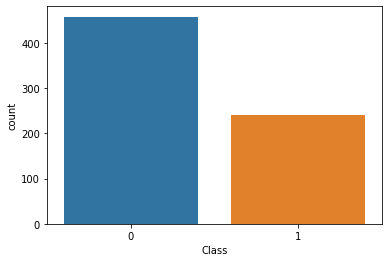

In [ ]:
plt.figure()
#df.Class.value_counts().plot(kind='bar')
sns.countplot(df.Class)

# ***Missing Value Checking***

In [ ]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

***Missing Value Imputation:***

In [ ]:
df['Bare.nuclei'] = df['Bare.nuclei'].fillna(np.mean(df['Bare.nuclei']))

In [ ]:
df.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

# ***Feature Reduction***

In [ ]:
df.corr()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098668,-0.060051,-0.052072,-0.034901,-0.080226
Cl.thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
Cell.size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
Cell.shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
Marg.adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
Epith.c.size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
Bare.nuclei,-0.098668,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
Bl.cromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
Normal.nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170


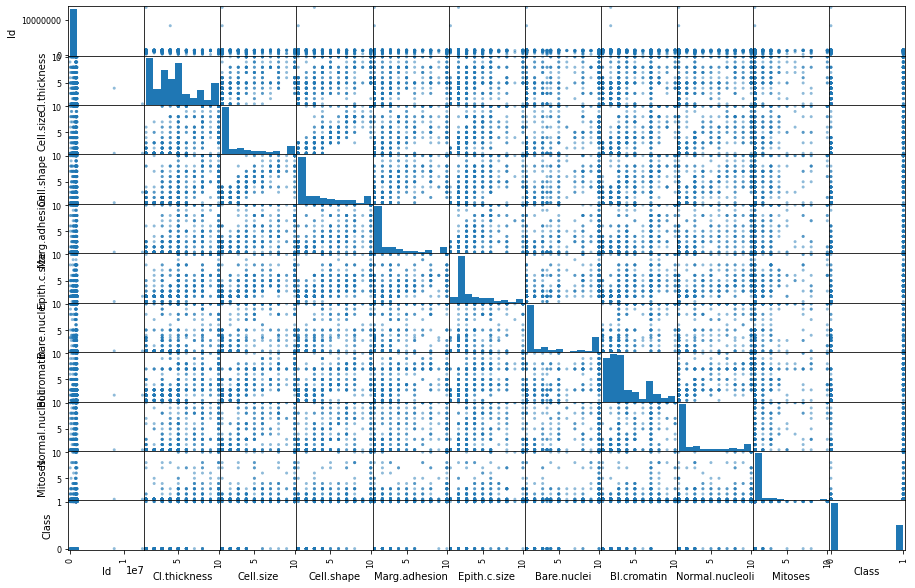

In [ ]:

# From above we can see strong +correlation between Cl.thickness,Cell.size,Cell.shape,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin & Normal.nucleoli, lets confirm by plotting

%matplotlib inline


pd.plotting.scatter_matrix(df, figsize =(15,10))
plt.show()

In [ ]:
# Drop Id & Mitoses column not used in analysis
df.drop(['Id','Mitoses','Cell.shape'], 1, inplace=True)

In [ ]:
df.head(6)

,Cl.thickness,Cell.size,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Class
0,5,1,1,2,1.0,3,1,0
1,5,4,5,7,10.0,3,2,0
2,3,1,1,2,2.0,3,1,0
3,6,8,1,3,4.0,3,7,0
4,4,1,3,2,1.0,3,1,0
5,8,10,8,7,10.0,9,7,1


# ***Outlayer Checking***

(array([[145.,  50., 108.,  80., 130.,  34.,  23.,  46.,  14.,  69.],
        [384.,  45.,  52.,  40.,  30.,  27.,  19.,  29.,   6.,  67.],
        [407.,  58.,  58.,  33.,  23.,  22.,  13.,  25.,   5.,  55.],
        [ 47., 386.,  72.,  48.,  39.,  41.,  12.,  21.,   2.,  31.],
        [402.,  30.,  44.,  19.,  30.,   4.,   8.,  21.,   9., 132.],
        [152., 166., 165.,  40.,  34.,  10.,  73.,  28.,  11.,  20.],
        [443.,  36.,  44.,  18.,  19.,  22.,  16.,  24.,  16.,  61.]]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 7 Lists of Patches objects>)

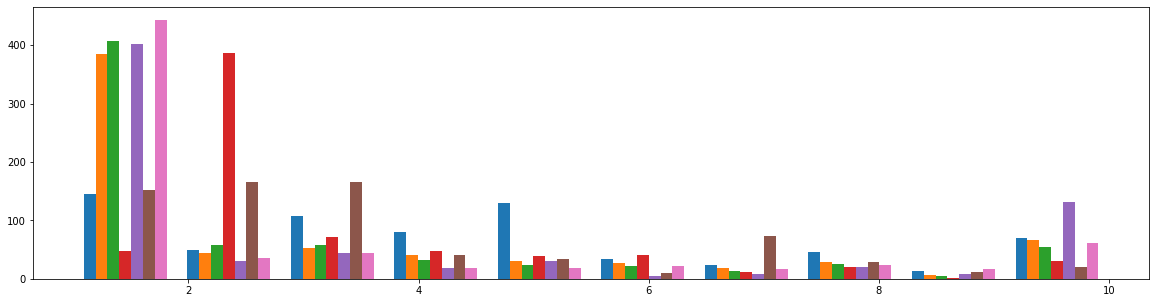

In [ ]:
plt.figure(figsize=(20,5))
plt.hist(df.iloc[:,:-1].T)


**The data set contains several outlayers, So we have to apply Normalization here.**

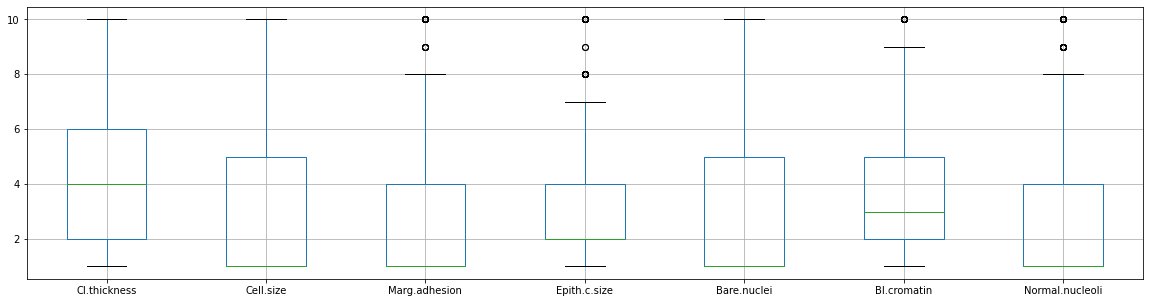

In [ ]:
df.iloc[:,:-1].boxplot(figsize=(20,5))


# ***Train Test Split***

In [ ]:
X = np.array(df.drop(['Class'], axis=1))
y = np.array(df['Class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 121)

# ***Normalization***

In [ ]:
# Scale the data. We will use the same scaler later for scoring function
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ***Voting Classifier: Multiple Model Ensemble***

In [ ]:
lr = LogisticRegression(random_state = 45)
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
dt = DecisionTreeClassifier(max_depth=2)



In [ ]:
Voting_Classifier = VotingClassifier(estimators=[('dt',dt),('lr',lr),('knn',knn)], voting= 'hard')

In [ ]:
Voting_Classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=2,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
      

***Score***

In [ ]:
print('Train Score:',Voting_Classifier.score(X_train,y_train))
print('Test Scxore:',Voting_Classifier.score(X_test,y_test))

Train Score: 0.9731663685152058
Test Scxore: 0.9642857142857143


***Prediction***

In [ ]:
# Predicting the Test set results
y_pred = Voting_Classifier.predict(X_test)

# ***Result Analysis***

**Applying K-Fold Cross Validation**

In [ ]:
accuracies = (cross_val_score(estimator = Voting_Classifier, X = X_train, y = y_train, cv = 5))
print(accuracies)

[0.97321429 0.94642857 0.95535714 0.97321429 0.96396396]


In [ ]:
print(accuracies.mean())

0.96243564993565


In [ ]:
print(accuracies.std())

0.01040216849563941


***Confusion Matrix***

In [ ]:
# Making the Confusion Matrix 
print(confusion_matrix(y_test, y_pred))

[[85  2]
 [ 3 50]]


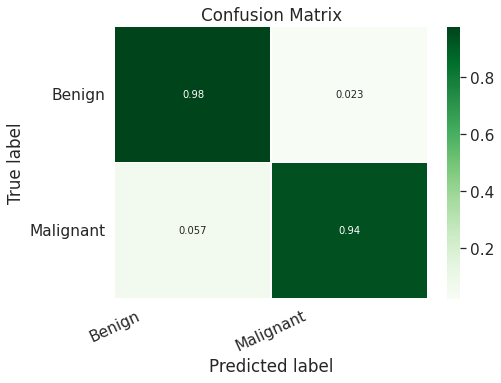

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Benign','Malignant']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

***Precision***

In [ ]:
precision_score(y_test, y_pred)

0.9615384615384616

***Recall***

In [ ]:
recall_score(y_test, y_pred)

0.9433962264150944

***f1 Score***

In [ ]:
f1_score(y_test, y_pred)

0.9523809523809524

***Classification Report***

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        87
           1       0.96      0.94      0.95        53

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

